## Plot zonal-mean total column ozone

In this exercise you will read-in various total column ozone (TCO) datasets from a variety of sources:

1. Observations from Bodeker Scientific
2. Processed UKCA data submitted to phase 1 of the Chemistry-Climate Model Initative (CCMI1)
3. A ensemble of processed UKCA submitted to CCMI2022
4. UM-UKCA pp-file output run as part of the NERC ACSIS project

Some example plots will be given, along with suggested exercises for you to complete.

In [1]:
import cf
import cfplot as cfp
import matplotlib.pyplot as plt

In [2]:
# define the locations of the various datasets
# CCMI2022 refD1 ensemble
ensdata='/home/ubuntu/Tutorials/UMvn13.0/data/toz_Amon_UKESM1-StratTrop_refD1_r?i1p1f2_gn_19600101-20190101.nc'
# CCMI1 refC1
ccmidata='/home/ubuntu/Tutorials/UMvn13.0/data/toz_monthly_UMUKCA-UCAM_refC1_r1i1p1_*.nc'
# UKCA model data from ACSIS project, nudged to ERA5
ukcadata='/home/ubuntu/Tutorials/UMvn13.0/data/u-*/apm.pp/*.pp'
# Bodeker Scientific TCO dataset - https://www.bodekerscientific.com/data/total-column-ozone
# this has been preprocessed into a single file using ncks, ncatted, and ncrcat
# for i in `ls *.nc`; do echo $i; ncks -O --mk_rec_dmn time $i $i; done
# for i in `ls *.nc`; do echo $i; ncatted -O -a created,global,d,, $i; done
# for i in `ls *.nc`; do echo $i; ncatted -O -a units,longitude,o,c,degrees_east $i; done
# for i in `ls *.nc`; do echo $i; ncatted -O -a units,latitude,o,c,degrees_north $i; done
# ncrcat BSFilledTCO_V3.4.1_????_Monthly.nc ../BSFilledTCO_V3.4.1_Monthly.nc
obsdata='/home/ubuntu/Tutorials/UMvn13.0/data/Bodeker_3.4.1/*.nc'
# We would like to thank Bodeker Scientific, funded by the New Zealand Deep South National 
# Science Challenge, for providing the combined NIWA-BS total column ozone database.

In [3]:
# read observations
obs=cf.read(obsdata,select='equivalent_thickness_at_stp_of_atmosphere_ozone_content')[0]

In [4]:
# zonal mean
obs_zm=obs.collapse('X: mean')

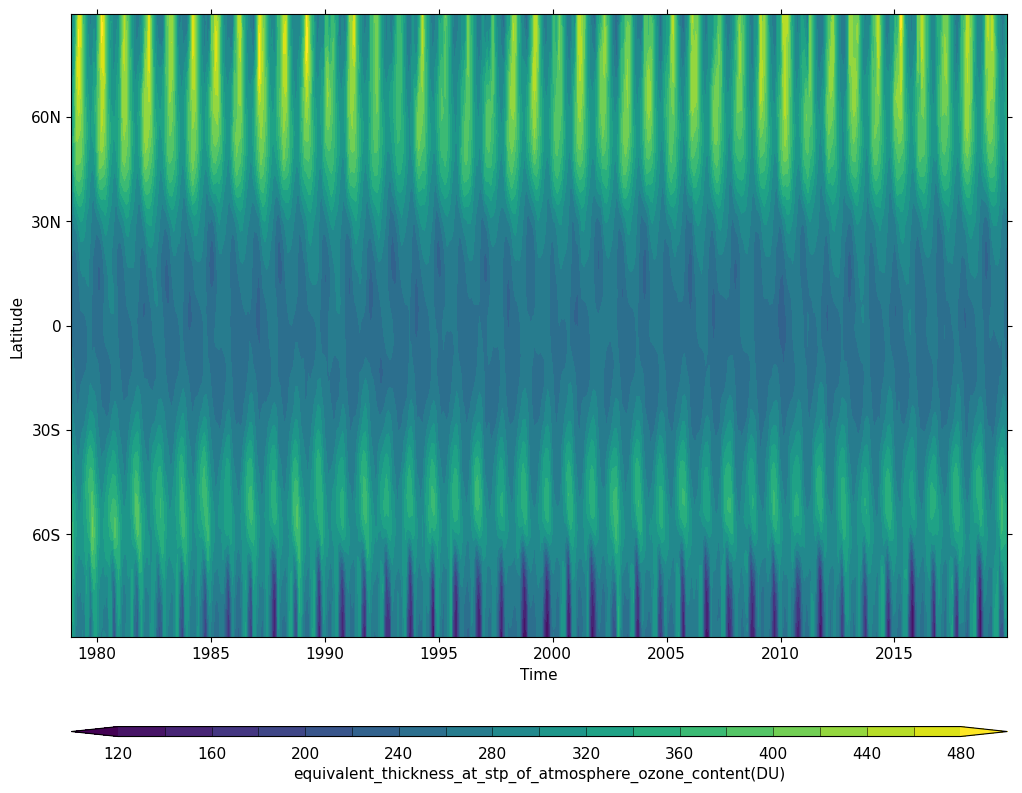

In [5]:
# plot the data - need to swap the axes due to how cf-plot works by default
cfp.levs(min=120, max=480, step=20)
cfp.con(obs_zm, lines=False, swap_axes=True)

In [6]:
# read-in the UM-UKCA pp data, TCO is in STASH code s50i219
ukca=cf.read(ukcadata,select='stash_code=50219')[0]

In [7]:
ukca_zm=ukca.collapse('X: mean')

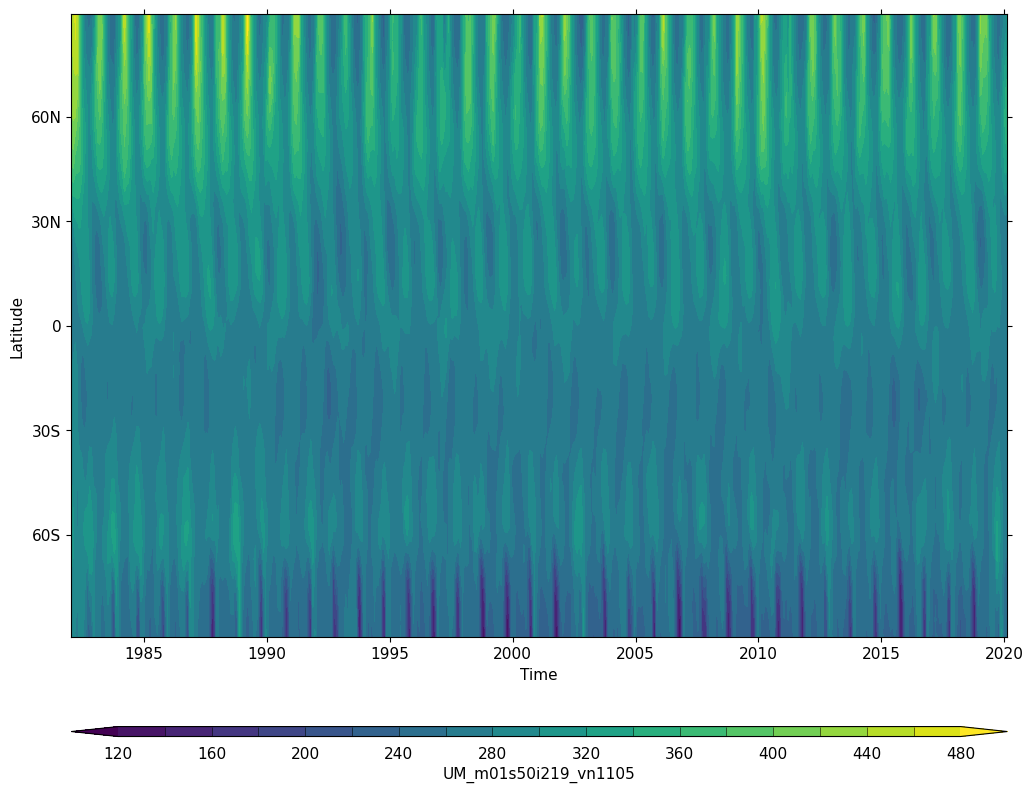

In [8]:
cfp.levs(min=120, max=480, step=20)
cfp.con(ukca_zm, lines=False, swap_axes=True)

In [9]:
# normalise time units to allow for plotting on the same graph
obs_zm.coordinate('T').set_property('units','days since 1970-01-01')
ukca_zm.coordinate('T').set_property('units','days since 1970-01-01')

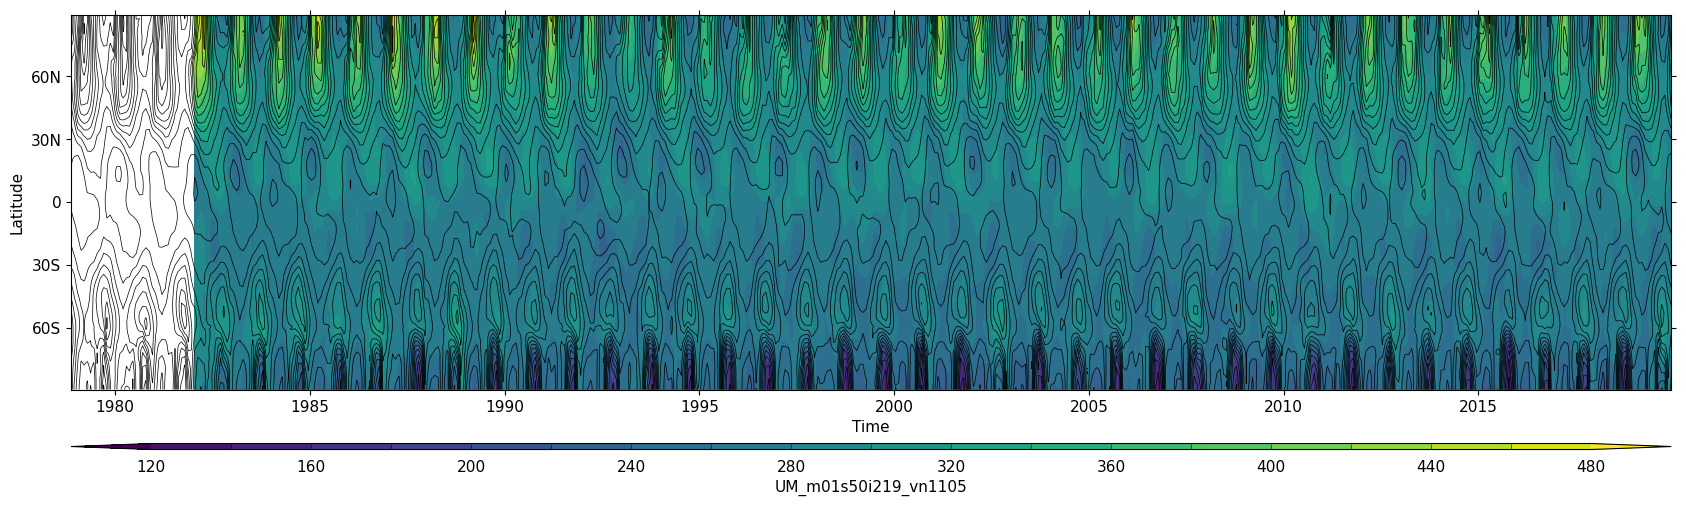

In [10]:
# quite a lot of data so stretch the plot
cfp.gopen(figsize=(20,5))
cfp.levs(min=120, max=480, step=20)
cfp.con(ukca_zm, lines=False, fill=True, swap_axes=True)
cfp.con(obs_zm, fill=False, lines=True, linewidths=0.5, line_labels=False, swap_axes=True)
cfp.gclose()

In [11]:
# 10-year files for CCMI1
ccmi=cf.read(ccmidata, select='equivalent_thickness_at_stp_of_atmosphere_ozone_content')[0]

In [12]:
ccmi_zm=ccmi.collapse('X: mean')

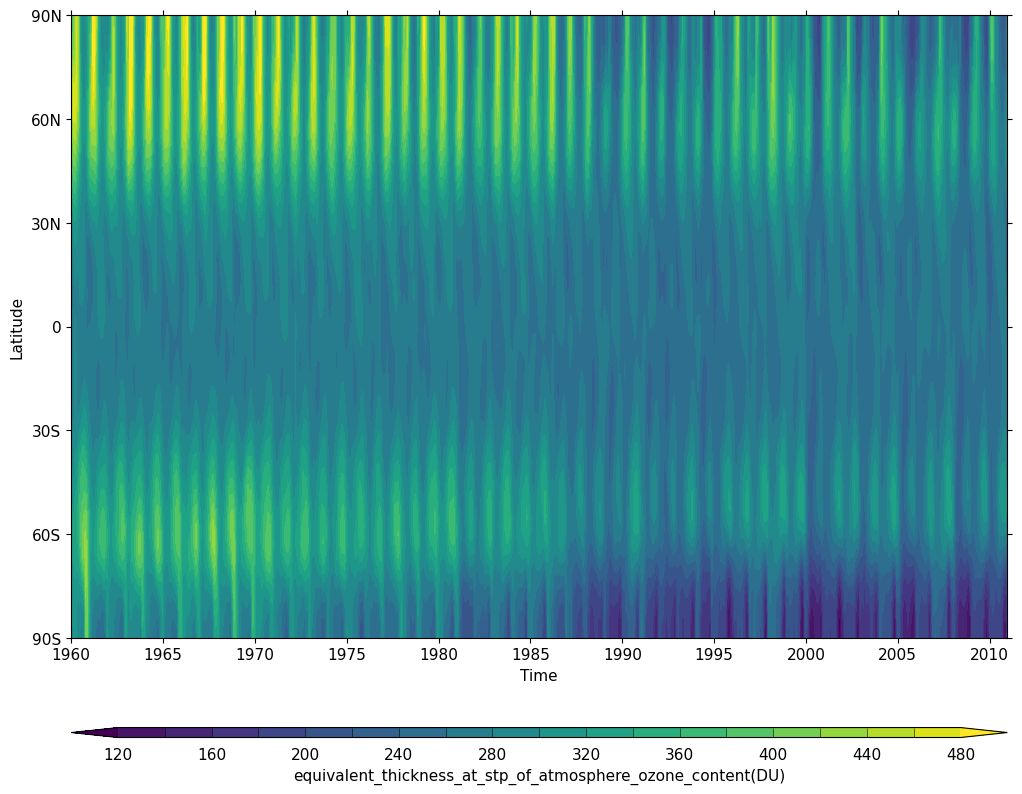

In [13]:
# when plotting here note that run starts in 1960
cfp.levs(min=120, max=480, step=20)
cfp.con(ccmi_zm, lines=False, swap_axes=True)

In [14]:
# only select UKCA data from 1978 onwards to compare to the observations
ccmi_1978=ccmi_zm.subspace(T=cf.ge(cf.dt('1978-01-01')))
# similarly this data stops in 2011, so restrict the obs in the same way
obs_2011=obs_zm.subspace(T=cf.le(cf.dt('2012-01-01')))

In [15]:
# note that the observations have a gregorian calendar, whereas the UKCA data uses a 360-day calendar
# CCMI1
ccmi_1978.coordinate('time').set_property('units','days since 1970-01-01')
ccmi_1978.coordinate('time').set_property('calendar','360_day')

# so do a rough conversion to normalise
obs.coordinate('time').set_property('units','days since 1970-01-01')
obs_2011.coordinate('time').override_calendar('360_day')
obs_2011.coordinate('time').set_data(obs_2011.coordinate('time').array*(360.0/365.24))

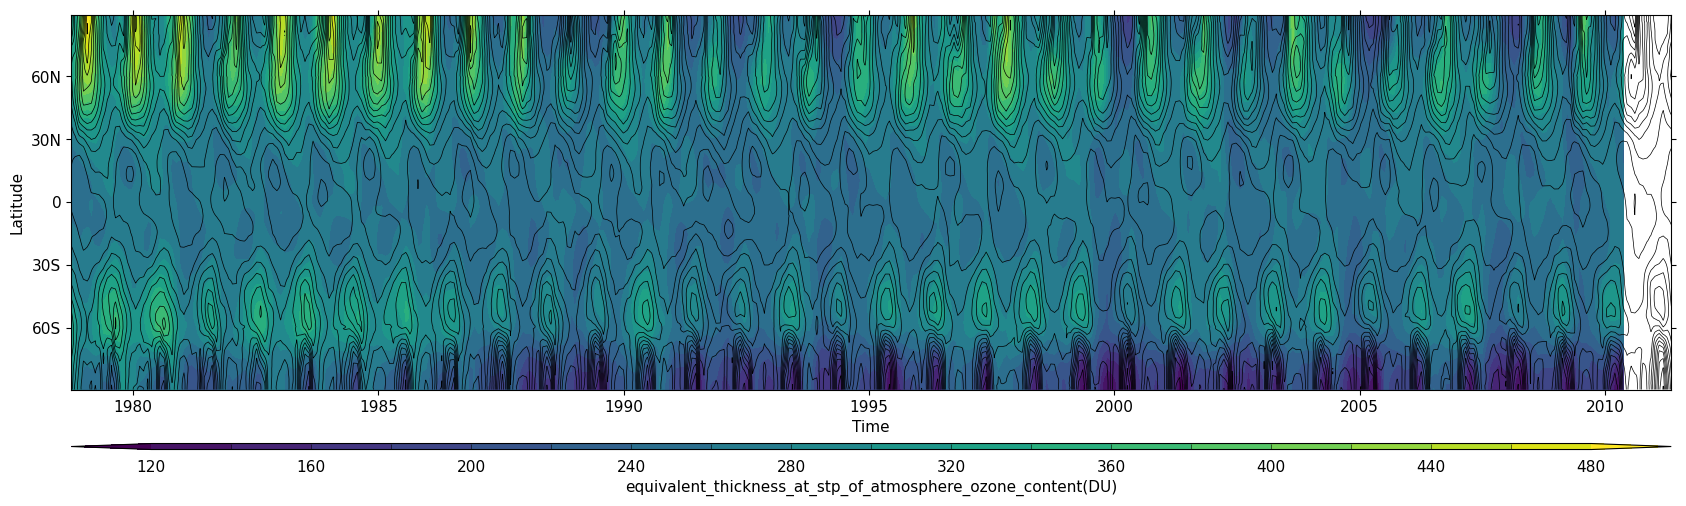

In [16]:
# quite a lot of data so stretch the plot
cfp.gopen(figsize=(20,5))
cfp.levs(min=120, max=480, step=20)
cfp.con(ccmi_1978, lines=False, fill=True, swap_axes=True)
cfp.con(obs_2011, fill=False, lines=True, linewidths=0.5, line_labels=False, swap_axes=True)
cfp.gclose()

### Further exercises to try:

1. Plot members from the CCMI2022 ensemble
2. Produce a plot of the ensemble mean of the 3 ensemble members. How would you go about calculating the ensemble mean?

<details>
<summary>Hint: </summary>
You may need to delete the auxillary coordinates 'forecast_period' and 'forecast_reference_time' in the CCMI2022 ensemble using the cf-python 'f.del_construct()' operation.
</details>